# Data Exploration
การวิเคราะห์ข้อมูล order เพื่อค้นหา insights และ patterns สำหรับการ generate ข้อมูลแบบมีหลักการ

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('large_order_data_2024/large_order_data_2024.csv')
df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'])

print(f"Total records: {len(df):,}")
print(f"Date range: {df['transaction_datetime'].min()} to {df['transaction_datetime'].max()}")
print(f"\nData shape: {df.shape}")
df.head(10)

Total records: 1,000,000
Date range: 2024-01-01 00:01:31 to 2024-12-30 23:58:42

Data shape: (1000000, 8)


,order_no,amount,customer_no,branch,brand,sku,quantity,transaction_datetime
0,ORD350427,5940,CUST9271,KHONKAEN,PUMA,PU-PANT-35,4,2024-01-12 23:27:39
1,ORD205951,8683,CUST4294,PHUKET,REEBOK,RE-SHOE-15,2,2024-02-02 22:08:06
2,ORD106275,557,CUST7958,CHIANGMAI,ADIDAS,AD-SHOE-45,1,2024-12-25 00:23:41
3,ORD281469,9426,CUST0579,HATYAI,NIKE,NI-BAG-28,4,2024-10-22 04:46:38
4,ORD262961,3803,CUST9070,KHONKAEN,REEBOK,RE-SHOE-43,4,2024-08-24 14:26:03
5,ORD110856,3489,CUST8122,KHONKAEN,ADIDAS,AD-CAP-20,5,2024-03-12 17:32:03
6,ORD331406,2834,CUST9909,KHONKAEN,ADIDAS,AD-SOCK-10,5,2024-03-17 21:24:28
7,ORD185529,3433,CUST7549,CHIANGMAI,NIKE,NI-BAG-48,2,2024-07-04 05:03:54
8,ORD243169,3743,CUST7014,PHUKET,ADIDAS,AD-BAG-11,2,2024-01-14 19:14:15
9,ORD322447,5937,CUST7922,BANGKOK,NEWBALANCE,NE-BAG-03,3,2024-06-28 07:12:14


In [14]:
# Top 20 ลูกค้าที่ใช้จ่ายมากที่สุด
if 'customer_stats' not in globals():
    customer_stats = df.groupby('customer_no').agg({
        'order_no': 'count',
        'amount': 'sum',
        'quantity': 'sum'
    }).round(2)
    customer_stats.columns = ['Total_Orders', 'Total_Spent', 'Total_Items']

top_customers = customer_stats.sort_values("Total_Spent", ascending=False).head(20)
top_customers["Avg_Order_Value"] = (top_customers["Total_Spent"] / top_customers["Total_Orders"]).round(2)

top_customer_id = top_customers.index[0]
top_customer_spent = top_customers["Total_Spent"].iloc[0]
top_customer_orders = int(top_customers["Total_Orders"].iloc[0])

print("=== TOP 20 CUSTOMERS BY SPENDING ===")
print(top_customers)
print(f"\nTop customer: {top_customer_id} spent {top_customer_spent:,.2f} THB in {top_customer_orders} orders")


=== TOP 20 CUSTOMERS BY SPENDING ===
             Total_Orders  Total_Spent  Total_Items  Avg_Order_Value
customer_no                                                         
CUST1033              137       757452          414          5528.85
CUST4327              131       752124          402          5741.40
CUST0788              139       732609          416          5270.57
CUST6214              125       723501          382          5788.01
CUST4430              120       722868          356          6023.90
CUST0161              121       721033          361          5958.95
CUST9839              131       719359          387          5491.29
CUST4630              138       717498          411          5199.26
CUST6144              129       713544          404          5531.35
CUST7560              130       708156          381          5447.35
CUST6609              120       707822          347          5898.52
CUST0974              124       706666          376          5698.

In [15]:
# เพิ่ม columns สำหรับการวิเคราะห์เวลา
df['month'] = df['transaction_datetime'].dt.month
df['month_name'] = df['transaction_datetime'].dt.strftime('%B')
df['day_of_week'] = df['transaction_datetime'].dt.day_name()
df['hour'] = df['transaction_datetime'].dt.hour

# สถิติรายเดือน
monthly_stats = df.groupby(['month', 'month_name']).agg({
    'order_no': 'count',
    'amount': 'sum',
    'customer_no': 'nunique'
}).round(2)

monthly_stats.columns = ['Orders', 'Revenue', 'Unique_Customers']

print("=== MONTHLY PERFORMANCE ===")
print(monthly_stats)
best_month_idx = monthly_stats['Revenue'].idxmax()
print(f"\nBest month: {best_month_idx[1]} (Month {best_month_idx[0]}) with {monthly_stats['Revenue'].max():,.2f} THB")

=== MONTHLY PERFORMANCE ===
                  Orders    Revenue  Unique_Customers
month month_name                                     
1     January      84542  444679316              9996
2     February     80041  420625567              9997
3     March        84862  444463603              9999
4     April        81756  429132573              9998
5     May          84549  444012339              9997
6     June         82062  431766120              9997
7     July         85913  450449140              9999
8     August       84604  444924002              9998
9     September    82162  432276684              9998
10    October      84006  441131340              9999
11    November     82153  430921017              9997
12    December     83350  436089770              9998

Best month: July (Month 7) with 450,449,140.00 THB


In [16]:
# สถิติตามช่วงเวลา (hourly)
hourly_stats = df.groupby('hour').agg({
    'order_no': 'count',
    'amount': 'sum'
}).round(2)

hourly_stats.columns = ['Orders', 'Revenue']

print("=== HOURLY PERFORMANCE ===")
print(hourly_stats)
print(f"\nPeak hour: {hourly_stats['Orders'].idxmax()}:00 with {hourly_stats['Orders'].max():,} orders")

=== HOURLY PERFORMANCE ===
      Orders    Revenue
hour                   
0      42544  223542319
1      41420  217813907
2      41647  218981689
3      41535  218413606
4      41874  219649595
5      41026  215078428
6      41626  218628482
7      42369  222023868
8      41594  218329033
9      42291  221955884
10     42250  222453008
11     41551  217111974
12     40597  213962237
13     41378  217440272
14     41247  217053083
15     41218  216208732
16     41398  217323406
17     41864  219348544
18     42169  221360223
19     42195  221950738
20     42340  222295377
21     40307  211524135
22     41709  218853520
23     41851  219169411

Peak hour: 0:00 with 42,544 orders


In [17]:
# วิเคราะห์ยอดขายแยกตาม branch และ brand
branch_brand = df.groupby(['branch', 'brand']).agg({
    'order_no': 'count',
    'amount': 'sum'
}).round(2)

branch_brand.columns = ['Orders', 'Revenue']
branch_brand = branch_brand.sort_values('Revenue', ascending=False)

print("=== TOP 20 BRANCH × BRAND COMBINATIONS ===")
print(branch_brand.head(20))

=== TOP 20 BRANCH × BRAND COMBINATIONS ===
                      Orders    Revenue
branch    brand                        
KHONKAEN  NIKE         40219  211682130
BANGKOK   PUMA         40058  211497370
PHUKET    PUMA         40217  211346970
KHONKAEN  ADIDAS       40165  211287908
          NEWBALANCE   40202  211214435
          PUMA         40177  210944747
PHUKET    NIKE         40117  210891182
HATYAI    NIKE         40109  210799828
KHONKAEN  REEBOK       40064  210603101
CHIANGMAI NEWBALANCE   40076  210475501
BANGKOK   NEWBALANCE   40140  210370828
          REEBOK       40075  210352893
CHIANGMAI NIKE         40137  210157099
BANGKOK   ADIDAS       40065  210119743
          NIKE         39846  210098002
PHUKET    NEWBALANCE   40105  209874357
CHIANGMAI PUMA         40014  209684660
HATYAI    REEBOK       39888  209470944
          NEWBALANCE   39803  209409577
CHIANGMAI REEBOK       39827  208889736


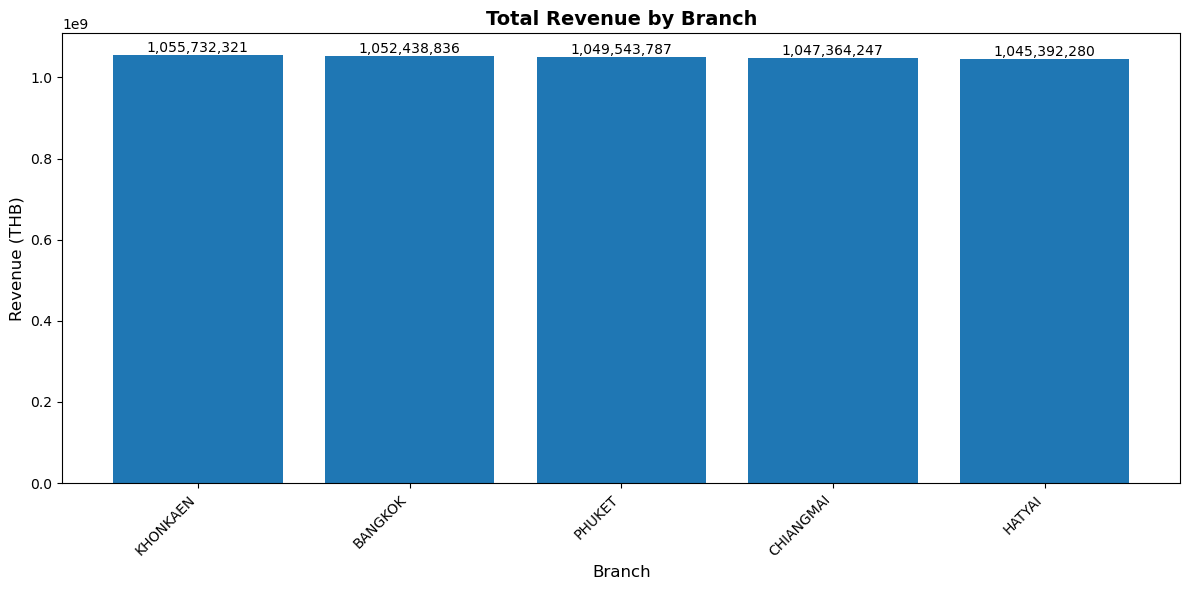


Total Revenue by Branch:
KHONKAEN: 1,055,732,321.00 THB
BANGKOK: 1,052,438,836.00 THB
PHUKET: 1,049,543,787.00 THB
CHIANGMAI: 1,047,364,247.00 THB
HATYAI: 1,045,392,280.00 THB


In [18]:
# Revenue by Branch - Bar chart with values
fig, ax = plt.subplots(figsize=(12, 6))
branch_revenue = df.groupby('branch')['amount'].sum().sort_values(ascending=False)
bars = ax.bar(range(len(branch_revenue)), branch_revenue.values)
ax.set_xticks(range(len(branch_revenue)))
ax.set_xticklabels(branch_revenue.index, rotation=45, ha='right')
ax.set_ylabel('Revenue (THB)', fontsize=12)
ax.set_xlabel('Branch', fontsize=12)
ax.set_title('Total Revenue by Branch', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, branch_revenue.values)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50000, 
            f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nTotal Revenue by Branch:")
for branch, revenue in branch_revenue.items():
    print(f"{branch}: {revenue:,.2f} THB")

## Key Insights Summary สำหรับการ Generate Data

In [19]:
if 'month' not in df.columns:
    df['month'] = df['transaction_datetime'].dt.month
if 'month_name' not in df.columns:
    df['month_name'] = df['transaction_datetime'].dt.strftime('%B')
if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['transaction_datetime'].dt.day_name()
if 'hour' not in df.columns:
    df['hour'] = df['transaction_datetime'].dt.hour
if 'product_type' not in df.columns:
    df['product_type'] = df['sku'].str.split('-').str[1]

print("="*80)
print("KEY INSIGHTS FOR DATA GENERATION".center(80))
print("="*80)

print(f"\n1. DATA VOLUME:")
print(f"   - Total Orders: {len(df):,}")
print(f"   - Unique Customers: {df['customer_no'].nunique():,}")
print(f"   - Avg Orders per Customer: {len(df) / df['customer_no'].nunique():.2f}")

print(f"\n2. REVENUE PATTERNS:")
print(f"   - Total Revenue: {df['amount'].sum():,.2f} THB")
print(f"   - Average Order Value: {df['amount'].mean():,.2f} THB")
print(f"   - Median Order Value: {df['amount'].median():,.2f} THB")
print(f"   - Min Order: {df['amount'].min():,.2f} THB")
print(f"   - Max Order: {df['amount'].max():,.2f} THB")

print(f"\n3. QUANTITY PATTERNS:")
print(f"   - Quantity Range: {df['quantity'].min()} - {df['quantity'].max()} items")
print(f"   - Average Quantity: {df['quantity'].mean():.2f} items")
print(f"   - Most Common Quantity: {df['quantity'].mode()[0]} items")

print(f"\n4. LOCATION:")
print(f"   - Branches: {', '.join(sorted(df['branch'].unique()))}")
top_branch = df.groupby('branch')['amount'].sum().idxmax()
print(f"   - Top Branch: {top_branch}")

print(f"\n5. BRANDS:")
print(f"   - Available: {', '.join(sorted(df['brand'].unique()))}")
top_brand = df.groupby('brand')['order_no'].count().idxmax()
print(f"   - Most Popular: {top_brand}")

print(f"\n6. PRODUCTS:")
print(f"   - Total SKUs: {df['sku'].nunique()}")
print(f"   - Product Types: {', '.join(sorted(df['product_type'].unique()))}")
top_product = df.groupby('product_type')['order_no'].count().idxmax()
print(f"   - Top Category: {top_product}")

print(f"\n7. TIME PATTERNS:")
print(f"   - Date Range: {df['transaction_datetime'].min().date()} to {df['transaction_datetime'].max().date()}")
print(f"   - Peak Hour: {df.groupby('hour')['order_no'].count().idxmax()}:00")
print(f"   - Busiest Day: {df.groupby('day_of_week')['order_no'].count().idxmax()}")
best_month_idx = df.groupby(['month', 'month_name'])['amount'].sum().idxmax()
print(f"   - Best Month: {best_month_idx[1]} (Month {best_month_idx[0]})")

print("\n" + "="*80)

                        KEY INSIGHTS FOR DATA GENERATION                        

1. DATA VOLUME:
   - Total Orders: 1,000,000
   - Unique Customers: 10,000
   - Avg Orders per Customer: 100.00

2. REVENUE PATTERNS:
   - Total Revenue: 5,250,471,471.00 THB
   - Average Order Value: 5,250.47 THB
   - Median Order Value: 5,249.00 THB
   - Min Order: 500.00 THB
   - Max Order: 9,999.00 THB

3. QUANTITY PATTERNS:
   - Quantity Range: 1 - 5 items
   - Average Quantity: 3.00 items
   - Most Common Quantity: 2 items

4. LOCATION:
   - Branches: BANGKOK, CHIANGMAI, HATYAI, KHONKAEN, PHUKET
   - Top Branch: KHONKAEN

5. BRANDS:
   - Available: ADIDAS, NEWBALANCE, NIKE, PUMA, REEBOK
   - Most Popular: NIKE

6. PRODUCTS:
   - Total SKUs: 1250
   - Product Types: BAG, CAP, PANT, SHOE, SOCK
   - Top Category: SOCK

7. TIME PATTERNS:
   - Date Range: 2024-01-01 to 2024-12-30
   - Peak Hour: 0:00
   - Busiest Day: Monday
   - Best Month: July (Month 7)



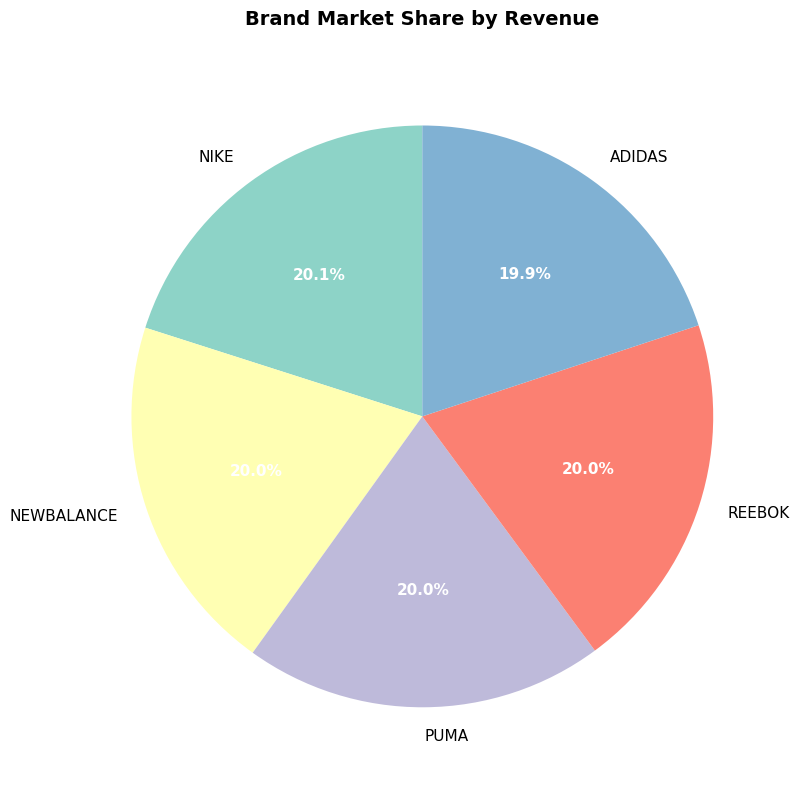


Brand Market Share:
NIKE: 1,053,628,241.00 THB (20.07%)
NEWBALANCE: 1,051,344,698.00 THB (20.02%)
PUMA: 1,050,968,188.00 THB (20.02%)
REEBOK: 1,048,159,122.00 THB (19.96%)
ADIDAS: 1,046,371,222.00 THB (19.93%)


In [20]:
# Brand Market Share - Pie chart with percentages
fig, ax = plt.subplots(figsize=(10, 8))
brand_revenue = df.groupby('brand')['amount'].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(brand_revenue)))

wedges, texts, autotexts = ax.pie(brand_revenue.values, 
                                    labels=brand_revenue.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90,
                                    textprops={'fontsize': 11})

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Brand Market Share by Revenue', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nBrand Market Share:")
total_revenue = brand_revenue.sum()
for brand, revenue in brand_revenue.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{brand}: {revenue:,.2f} THB ({percentage:.2f}%)")

In [21]:
if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['transaction_datetime'].dt.day_name()

# สถิติตามวันในสัปดาห์
weekday_stats = df.groupby('day_of_week').agg({
    'order_no': 'count',
    'amount': 'sum'
}).round(2)

weekday_stats.columns = ['Orders', 'Revenue']
# เรียงลำดับวัน
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats = weekday_stats.reindex([d for d in day_order if d in weekday_stats.index])

print("=== DAY OF WEEK PERFORMANCE ===")
print(weekday_stats)
print(f"\nBusiest day: {weekday_stats['Orders'].idxmax()} with {weekday_stats['Orders'].max():,} orders")


=== DAY OF WEEK PERFORMANCE ===
             Orders    Revenue
day_of_week                   
Monday       144801  759505005
Tuesday      141816  744048040
Wednesday    142886  751058094
Thursday     142144  746924276
Friday       142233  746751516
Saturday     142842  750909185
Sunday       143278  751275355

Busiest day: Monday with 144,801 orders


## Time Analysis

In [22]:
# สถิติลูกค้า
customer_stats = df.groupby('customer_no').agg({
    'order_no': 'count',
    'amount': 'sum',
    'quantity': 'sum'
}).round(2)

customer_stats.columns = ['Total_Orders', 'Total_Spent', 'Total_Items']

print("=== CUSTOMER BEHAVIOR ===")
print(f"Total unique customers: {len(customer_stats):,}")
print(f"\nOrders per customer:")
print(customer_stats['Total_Orders'].describe())
print(f"\nSpending per customer:")
print(customer_stats['Total_Spent'].describe())

# การกระจายของจำนวน orders ต่อลูกค้า
order_distribution = customer_stats['Total_Orders'].value_counts().sort_index()
print(f"\n=== ORDER FREQUENCY DISTRIBUTION ===")
print(order_distribution.head(10))

=== CUSTOMER BEHAVIOR ===
Total unique customers: 10,000

Orders per customer:
count    10000.000000
mean       100.000000
std         10.045889
min         65.000000
25%         93.000000
50%        100.000000
75%        107.000000
max        140.000000
Name: Total_Orders, dtype: float64

Spending per customer:
count     10000.000000
mean     525047.147100
std       59435.872201
min      314356.000000
25%      483502.500000
50%      524684.000000
75%      564888.500000
max      757452.000000
Name: Total_Spent, dtype: float64

=== ORDER FREQUENCY DISTRIBUTION ===
Total_Orders
65     1
66     2
67     1
69     4
70     5
71     5
72     4
73    12
74    15
75    14
Name: count, dtype: int64


In [23]:
# Top 20 SKUs ตามยอดขาย
top_skus = df.groupby('sku').agg({
    'order_no': 'count',
    'amount': 'sum',
    'quantity': 'sum'
}).round(2)

top_skus.columns = ['Orders', 'Total_Revenue', 'Total_Quantity']
top_skus = top_skus.sort_values('Total_Revenue', ascending=False).head(20)

print("=== TOP 20 SKUs BY REVENUE ===")
print(top_skus)
print(f"\nTop SKU: {top_skus.index[0]} with {top_skus['Total_Revenue'].iloc[0]:,.2f} THB")

=== TOP 20 SKUs BY REVENUE ===
            Orders  Total_Revenue  Total_Quantity
sku                                              
NE-BAG-28      881        4816083            2669
AD-SOCK-02     889        4752138            2567
NE-PANT-30     887        4743953            2695
PU-SHOE-17     859        4699746            2633
NE-SHOE-23     868        4693330            2594
RE-PANT-40     869        4679566            2633
NI-SHOE-48     873        4656064            2677
AD-BAG-20      858        4632840            2545
NI-SOCK-23     859        4630074            2480
PU-PANT-49     860        4628103            2586
NI-CAP-32      867        4609734            2634
NE-SHOE-05     820        4601218            2507
PU-CAP-09      869        4598531            2586
PU-CAP-42      888        4598435            2690
NE-CAP-41      865        4597834            2592
AD-CAP-06      878        4597785            2598
AD-BAG-23      868        4595009            2593
AD-PANT-30     859 

In [24]:
# แยกประเภทสินค้าจาก SKU (เช่น SHOE, BAG, SOCK)
df['product_type'] = df['sku'].str.split('-').str[1]

product_stats = df.groupby('product_type').agg({
    'order_no': 'count',
    'amount': ['sum', 'mean'],
    'quantity': 'sum'
}).round(2)

product_stats.columns = ['Orders', 'Total_Revenue', 'Avg_Amount', 'Total_Quantity']
product_stats = product_stats.sort_values('Total_Revenue', ascending=False)
product_stats['Revenue_Percentage'] = (product_stats['Total_Revenue'] / product_stats['Total_Revenue'].sum() * 100).round(2)

print("=== PRODUCT TYPE PERFORMANCE ===")
print(product_stats)
print(f"\nProduct types available: {sorted(df['product_type'].unique())}")

=== PRODUCT TYPE PERFORMANCE ===
              Orders  Total_Revenue  Avg_Amount  Total_Quantity  \
product_type                                                      
SOCK          200385     1052540833     5252.59          600836   
PANT          200207     1050377346     5246.46          601402   
SHOE          200030     1050158633     5250.01          600308   
BAG           199893     1048705716     5246.34          599089   
CAP           199485     1048688943     5256.98          597550   

              Revenue_Percentage  
product_type                      
SOCK                       20.05  
PANT                       20.01  
SHOE                       20.00  
BAG                        19.97  
CAP                        19.97  

Product types available: ['BAG', 'CAP', 'PANT', 'SHOE', 'SOCK']


In [25]:
# สถิติแต่ละ brand
brand_stats = df.groupby('brand').agg({
    'order_no': 'count',
    'amount': ['sum', 'mean', 'median'],
    'customer_no': 'nunique',
    'quantity': 'sum'
}).round(2)

brand_stats.columns = ['Orders', 'Total_Revenue', 'Avg_Amount', 'Median_Amount', 'Unique_Customers', 'Total_Quantity']
brand_stats = brand_stats.sort_values('Total_Revenue', ascending=False)
brand_stats['Revenue_Percentage'] = (brand_stats['Total_Revenue'] / brand_stats['Total_Revenue'].sum() * 100).round(2)

print("=== BRAND PERFORMANCE ===")
print(brand_stats)
print(f"\nTop brand: {brand_stats.index[0]} with {brand_stats['Orders'].iloc[0]:,} orders")

=== BRAND PERFORMANCE ===
            Orders  Total_Revenue  Avg_Amount  Median_Amount  \
brand                                                          
NIKE        200428     1053628241     5256.89         5262.0   
NEWBALANCE  200326     1051344698     5248.17         5245.0   
PUMA        200078     1050968188     5252.79         5255.0   
REEBOK      199782     1048159122     5246.51         5234.0   
ADIDAS      199386     1046371222     5247.97         5248.0   

            Unique_Customers  Total_Quantity  Revenue_Percentage  
brand                                                             
NIKE                   10000          601492               20.07  
NEWBALANCE             10000          600045               20.02  
PUMA                   10000          599919               20.02  
REEBOK                 10000          599630               19.96  
ADIDAS                 10000          598099               19.93  

Top brand: NIKE with 200,428 orders


In [26]:
# สถิติแต่ละสาขา
branch_stats = df.groupby('branch').agg({
    'order_no': 'count',
    'amount': ['sum', 'mean', 'median'],
    'customer_no': 'nunique',
    'quantity': 'sum'
}).round(2)

branch_stats.columns = ['Orders', 'Total_Revenue', 'Avg_Amount', 'Median_Amount', 'Unique_Customers', 'Total_Quantity']
branch_stats = branch_stats.sort_values('Total_Revenue', ascending=False)
branch_stats['Revenue_Percentage'] = (branch_stats['Total_Revenue'] / branch_stats['Total_Revenue'].sum() * 100).round(2)

print("=== BRANCH PERFORMANCE ===")
print(branch_stats)
print(f"\nTop branch: {branch_stats.index[0]} with {branch_stats['Total_Revenue'].iloc[0]:,.2f} THB")

=== BRANCH PERFORMANCE ===
           Orders  Total_Revenue  Avg_Amount  Median_Amount  Unique_Customers  \
branch                                                                          
KHONKAEN   200827     1055732321     5256.92         5258.0             10000   
BANGKOK    200184     1052438836     5257.36         5263.0             10000   
PHUKET     200133     1049543787     5244.23         5247.0             10000   
CHIANGMAI  199790     1047364247     5242.33         5234.0             10000   
HATYAI     199066     1045392280     5251.49         5247.0             10000   

           Total_Quantity  Revenue_Percentage  
branch                                         
KHONKAEN           602283               20.11  
BANGKOK            601309               20.04  
PHUKET             599472               19.99  
CHIANGMAI          599144               19.95  
HATYAI             596977               19.91  

Top branch: KHONKAEN with 1,055,732,321.00 THB


In [27]:
# จำนวน unique values แต่ละ column
print("=== UNIQUE VALUES ===")
print(f"Unique Customers: {df['customer_no'].nunique():,}")
print(f"Unique Orders: {df['order_no'].nunique():,}")
print(f"Unique SKUs: {df['sku'].nunique():,}")
print(f"Unique Branches: {df['branch'].nunique()}")
print(f"Unique Brands: {df['brand'].nunique()}")

# แสดง branches และ brands ทั้งหมด
print(f"\nBranches: {sorted(df['branch'].unique())}")
print(f"Brands: {sorted(df['brand'].unique())}")

=== UNIQUE VALUES ===
Unique Customers: 10,000
Unique Orders: 316,875
Unique SKUs: 1,250
Unique Branches: 5
Unique Brands: 5

Branches: ['BANGKOK', 'CHIANGMAI', 'HATYAI', 'KHONKAEN', 'PHUKET']
Brands: ['ADIDAS', 'NEWBALANCE', 'NIKE', 'PUMA', 'REEBOK']


In [28]:
# สถิติของยอดขายและจำนวนสินค้า
print("=== AMOUNT STATISTICS ===")
print(df['amount'].describe())
print(f"\nTotal Revenue: {df['amount'].sum():,.2f} THB")
print(f"\n=== QUANTITY STATISTICS ===")
print(df['quantity'].describe())

=== AMOUNT STATISTICS ===
count    1000000.000000
mean        5250.471471
std         2742.145686
min          500.000000
25%         2876.000000
50%         5249.000000
75%         7624.000000
max         9999.000000
Name: amount, dtype: float64

Total Revenue: 5,250,471,471.00 THB

=== QUANTITY STATISTICS ===
count    1000000.000000
mean           2.999185
std            1.414245
min            1.000000
25%            2.000000
50%            3.000000
75%            4.000000
max            5.000000
Name: quantity, dtype: float64
